Enter the value of N for N-Queens problem:  4


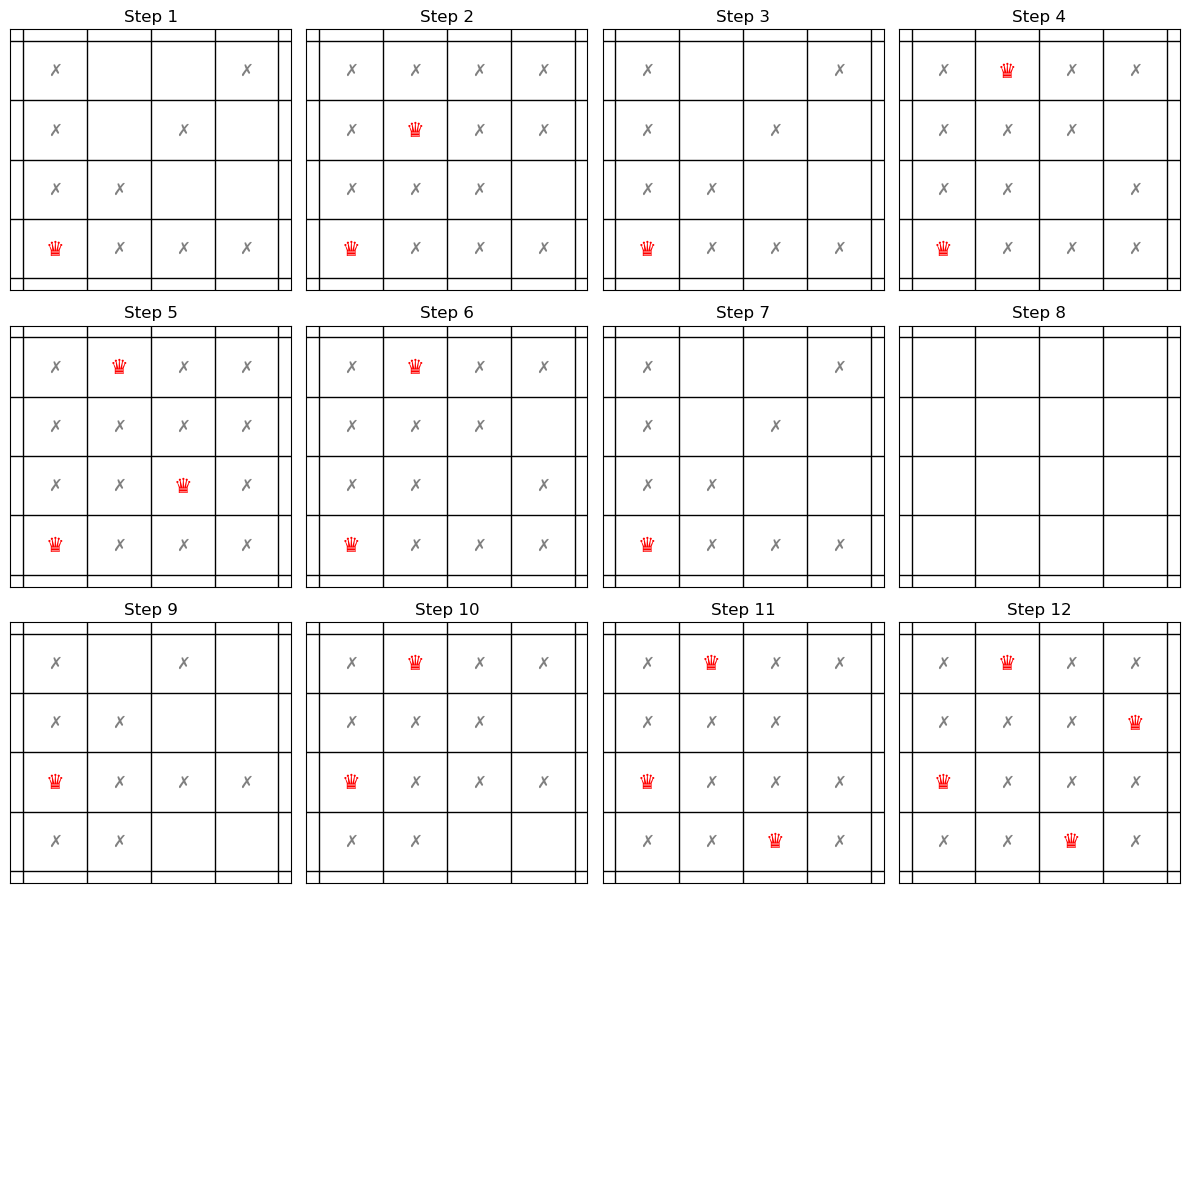

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def is_safe(board, row, col, n):
    """Check if a queen can be placed safely."""
    for i in range(col):
        if board[row][i] == 1:
            return False
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    for i, j in zip(range(row, n, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    return True

def draw_board(steps):
    """Plot all steps in one figure."""
    num_steps = len(steps)
    cols = 4  # Define number of columns in the grid layout
    rows = (num_steps // cols) + 1  # Calculate required rows

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()  # Flatten the 2D array of axes to loop easily

    for idx, board in enumerate(steps):
        ax = axes[idx]
        n = len(board)
        ax.set_xticks([])
        ax.set_yticks([])

        # Draw the grid
        for i in range(n + 1):
            ax.axhline(i - 0.5, color='black', lw=1)
            ax.axvline(i - 0.5, color='black', lw=1)

        # Place queens and mark constraints
        attack_marks = set()
        for i in range(n):
            for j in range(n):
                if board[i][j] == 1:
                    ax.text(j, i, '♛', fontsize=15, ha='center', va='center', color='red')
                    
                    # Mark attack paths (row, column, diagonals)
                    for k in range(n):
                        if k != j: attack_marks.add((i, k))  # Row attack
                        if k != i: attack_marks.add((k, j))  # Column attack
                    for d in range(1, n):
                        if 0 <= i + d < n and 0 <= j + d < n:
                            attack_marks.add((i + d, j + d))
                        if 0 <= i - d < n and 0 <= j - d < n:
                            attack_marks.add((i - d, j - d))
                        if 0 <= i + d < n and 0 <= j - d < n:
                            attack_marks.add((i + d, j - d))
                        if 0 <= i - d < n and 0 <= j + d < n:
                            attack_marks.add((i - d, j + d))

        # Display attack positions
        for x, y in attack_marks:
            if board[x][y] == 0:
                ax.text(y, x, '✗', fontsize=12, ha='center', va='center', color='gray')

        ax.set_title(f"Step {idx + 1}")

    # Hide unused subplots
    for i in range(idx + 1, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def solve_n_queens(board, col, n, steps):
    """Recursive function to solve N-Queens with step tracking."""
    if col >= n:
        return True
    for i in range(n):
        if is_safe(board, i, col, n):
            board[i][col] = 1
            steps.append([row[:] for row in board])  # Store board state

            if solve_n_queens(board, col + 1, n, steps):
                return True

            board[i][col] = 0  # Backtrack
            steps.append([row[:] for row in board])  # Store board state after backtracking
    return False

# Get user input for board size
n = int(input("Enter the value of N for N-Queens problem: "))

# Initialize board
board = [[0] * n for _ in range(n)]
steps = []  # Store all steps

# Solve and visualize
if solve_n_queens(board, 0, n, steps):
    draw_board(steps)
else:
    print("No solution exists.")
